In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [58]:
!PWD

/Users/talb/git/gitwork/gitwork/notebook


In [86]:
# df           = pd.read_csv("../../OneDrive - Hewlett Packard Enterprise/featuresRiskEvaluator/BACKLOG.csv")#, dtype={"RBI_FEATURE_ID":int, "RBI_ENTITY_ID":int})
df1           = pd.read_csv("../../../../OneDrive - Hewlett Packard Enterprise/featuresRiskEvaluator/defectesopenedPerfeature.csv")
df2           = pd.read_csv("../../../../OneDrive - Hewlett Packard Enterprise/featuresRiskEvaluator/defectesclosedPerfeature.csv")
df3           = pd.read_csv("../../../../OneDrive - Hewlett Packard Enterprise/featuresRiskEvaluator/userstories_count .csv")
df4           = pd.read_csv("../../../../OneDrive - Hewlett Packard Enterprise/featuresRiskEvaluator/ActualSP.csv")
features = pd.read_csv("../../../../OneDrive - Hewlett Packard Enterprise/featuresRiskEvaluator/features.csv")

In [94]:
features["Creation_date"] = pd.to_datetime(features["RBI_CREATION_DATE"],format="%d-%b-%Y")
features["vts_date"] = pd.to_datetime(features["RBI_VTS"],format="%Y-%M-%d", errors='ignore')
features.head()







,RBI_ID,RBI_ENTITY_ID,RBI_ENTITY_TYPE,RBI_ENTITY_NAME,RBI_RELEASE_ID,RBI_SPRINT_ID,RBI_TEAM_ID,RBI_OWNER,RBI_STORY_POINTS,RBI_STATUS,...,RBI_THEME_ID,RBI_FEATURE_ID,RBI_PRODUCT_ID,RBI_KANBAN_STATUS_ID,RBI_PRODUCT_GROUP_ID,RBI_ENTITY_SUB_TYPE,RBI_CREATION_DATE,RBI_LINKED_ENTITIES_INFO,Creation_date,vts_date
0,13119,6844,REQ,Performance on scroll down in grids.,NaN,NaN,NaN,NaN,NaN,New,...,6635.0,NaN,NaN,NaN,1000,71,01-DEC-2013,0,2013-12-01,2014-09-30 10:04:56
1,9925,5634,REQ,Recycle Bin,NaN,NaN,NaN,NaN,NaN,New,...,1979.0,NaN,NaN,NaN,1000,71,10-APR-2013,0,2013-04-10,2014-09-30 10:05:49
2,4085,2540,REQ,Dev environment,1001.0,NaN,106.0,NaN,NaN,New,...,2538.0,2540.0,NaN,21.0,1000,71,15-JUL-2012,0,2012-07-15,2014-09-30 10:02:11
3,4086,2541,REQ,CI,1001.0,NaN,106.0,NaN,NaN,New,...,2538.0,2541.0,NaN,21.0,1000,71,15-JUL-2012,0,2012-07-15,2014-09-30 10:02:33
4,4089,2545,REQ,Merging Web UI Platform into single trunk,1001.0,NaN,106.0,NaN,NaN,New,...,2538.0,2545.0,NaN,21.0,1000,71,16-JUL-2012,0,2012-07-16,2015-02-17 08:48:21


In [89]:
features.columns

Index([u'RBI_ID', u'RBI_ENTITY_ID', u'RBI_ENTITY_TYPE', u'RBI_ENTITY_NAME',
       u'RBI_RELEASE_ID', u'RBI_SPRINT_ID', u'RBI_TEAM_ID', u'RBI_OWNER',
       u'RBI_STORY_POINTS', u'RBI_STATUS', u'RBI_BLOCKED', u'RBI_RANK',
       u'RBI_VER_STAMP', u'RBI_VTS', u'RBI_THEME_ID', u'RBI_FEATURE_ID',
       u'RBI_PRODUCT_ID', u'RBI_KANBAN_STATUS_ID', u'RBI_PRODUCT_GROUP_ID',
       u'RBI_ENTITY_SUB_TYPE', u'RBI_CREATION_DATE',
       u'RBI_LINKED_ENTITIES_INFO'],
      dtype='object')

In [62]:
features[(features.RBI_STORY_POINTS.notnull()==True) & (features.RBI_FEATURE_ID.notnull()==True)]

,RBI_ID,RBI_ENTITY_ID,RBI_ENTITY_TYPE,RBI_ENTITY_NAME,RBI_RELEASE_ID,RBI_SPRINT_ID,RBI_TEAM_ID,RBI_OWNER,RBI_STORY_POINTS,RBI_STATUS,...,RBI_VER_STAMP,RBI_VTS,RBI_THEME_ID,RBI_FEATURE_ID,RBI_PRODUCT_ID,RBI_KANBAN_STATUS_ID,RBI_PRODUCT_GROUP_ID,RBI_ENTITY_SUB_TYPE,RBI_CREATION_DATE,RBI_LINKED_ENTITIES_INFO


In [63]:

features = features[(features.RBI_STORY_POINTS.notnull()==True)]
len(features)
features.head()
features.describe()

/Users/talb/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,RBI_ID,RBI_ENTITY_ID,RBI_RELEASE_ID,RBI_SPRINT_ID,RBI_TEAM_ID,RBI_STORY_POINTS,RBI_BLOCKED,RBI_RANK,RBI_VER_STAMP,RBI_THEME_ID,RBI_FEATURE_ID,RBI_PRODUCT_ID,RBI_KANBAN_STATUS_ID,RBI_PRODUCT_GROUP_ID,RBI_ENTITY_SUB_TYPE,RBI_LINKED_ENTITIES_INFO
count,269.000000,269.000000,211.000000,0.0,0.0,269.000000,0.0,2.690000e+02,269.000000,244.000000,0.0,0.0,0.0,269.000000,269.0,269.00000
mean,21624.070632,11628.486989,1117.658768,NaN,NaN,25.706320,NaN,1.044671e+07,20.717472,7936.274590,NaN,NaN,NaN,1001.000000,71.0,0.05948
std,6084.073525,3230.925053,29.440289,NaN,NaN,49.242387,NaN,6.692208e+06,16.014747,3581.677393,NaN,NaN,NaN,2.598794,0.0,0.38171
min,5717.000000,3974.000000,1052.000000,NaN,NaN,0.000000,NaN,2.730000e+06,2.000000,1075.000000,NaN,NaN,NaN,1000.000000,71.0,0.00000
25%,16357.000000,8878.000000,NaN,NaN,NaN,5.000000,NaN,3.546000e+06,10.000000,NaN,NaN,NaN,NaN,1000.000000,71.0,0.00000
50%,20705.000000,11522.000000,NaN,NaN,NaN,15.000000,NaN,1.076300e+07,16.000000,NaN,NaN,NaN,NaN,1000.000000,71.0,0.00000
75%,26274.000000,14008.000000,NaN,NaN,NaN,28.000000,NaN,1.431200e+07,27.000000,NaN,NaN,NaN,NaN,1000.000000,71.0,0.00000
max,32895.000000,17817.000000,1191.000000,NaN,NaN,600.000000,NaN,2.403700e+07,110.000000,17808.000000,NaN,NaN,NaN,1013.000000,71.0,5.00000


In [10]:
df1.values[0]

array([  nan,  312.])

In [11]:
df1.columns.rename(columns={u'COUNT(*)': '#Closed_Defects'})
df2.columns.rename(columns={u'COUNT(*)': '#opened_Defects'})
len(df2.isnull())
df1.columns.rename()

TypeError: rename() got an unexpected keyword argument 'columns'

In [12]:
# df = df[df.RBI_FEATURE_ID.notnull()]
features.RBI_TEAM_ID = features.RBI_TEAM_ID.fillna(0)
features.RBI_RELEASE_ID = features.RBI_RELEASE_ID.fillna(0)
features.RBI_THEME_ID = features.RBI_THEME_ID.fillna(0)
features.RBI_SPRINT_ID = features.RBI_SPRINT_ID.fillna(0)
features.RBI_THEME_ID = features.RBI_THEME_ID.fillna(0)
# df1 = df1[df1.RBI_FEATURE_ID.notnull()]
# df2 = df2[df2.RBI_FEATURE_ID.notnull()]
# df4 = df4[df4.RBI_FEATURE_ID.notnull()]
features.drop_duplicates()
del features['RBI_FEATURE_ID']


In [13]:
df1.head()

,RBI_FEATURE_ID,DEFECTS_OPENED
0,NaN,312
1,4493.0,1
2,3055.0,1
3,6525.0,12
4,4449.0,5


In [14]:
# df1.RBI_FEATURE_ID = df1.RBI_FEATURE_ID.astype(int)
# df2.RBI_FEATURE_ID = df2.RBI_FEATURE_ID.astype(int)
# df.RBI_FEATURE_ID = df.RBI_FEATURE_ID.astype(int)
# df4.RBI_FEATURE_ID = df4.RBI_FEATURE_ID.astype(int)

In [64]:
df = df[df.RBI_STORY_POINTS.notnull()]
# features = df[df['RBI_ENTITY_SUB_TYPE']==71  ]

AttributeError: 'DataFrame' object has no attribute 'RBI_STORY_POINTS'

In [65]:
# df = df[df.RBI_FEATURE_ID.notnull()]
features = features.drop(['RBI_PRODUCT_ID','RBI_KANBAN_STATUS_ID', 'RBI_ENTITY_SUB_TYPE', 'RBI_BLOCKED'] , axis=1)
# df = df[df.RBI_STORY_POINTS.notnull()]
features.describe()
features.head()

,RBI_ID,RBI_ENTITY_ID,RBI_ENTITY_TYPE,RBI_ENTITY_NAME,RBI_RELEASE_ID,RBI_SPRINT_ID,RBI_TEAM_ID,RBI_OWNER,RBI_STORY_POINTS,RBI_STATUS,RBI_RANK,RBI_VER_STAMP,RBI_VTS,RBI_THEME_ID,RBI_FEATURE_ID,RBI_PRODUCT_GROUP_ID,RBI_CREATION_DATE,RBI_LINKED_ENTITIES_INFO
75,5717,3974,REQ,Security- On Premise,1073.0,NaN,NaN,NaN,12.0,New,3467000,28,2014-09-30 10:03:23,8853.0,NaN,1000,13-������ -2012,0
120,13138,6863,REQ,Recycle Bin and enhance archive,NaN,NaN,NaN,NaN,50.0,New,12717000,51,2015-07-05 22:56:27,6635.0,NaN,1000,01-����� -2013,0
158,8341,4822,REQ,Synchronizer - Filters,NaN,NaN,NaN,NaN,9.0,New,4670000,29,2014-09-30 10:05:08,6941.0,NaN,1000,29-����� -2013,0
159,8342,4823,REQ,Synchronizer - Link configuration,1104.0,NaN,NaN,NaN,23.0,New,4671000,41,2015-03-10 13:33:13,6941.0,NaN,1000,29-����� -2013,1
195,8343,4824,REQ,Synchronizer - Scheduled synchronization,1104.0,NaN,NaN,NaN,4.0,New,4672000,37,2015-01-21 10:18:10,6941.0,NaN,1000,29-����� -2013,0


In [17]:
features = features.fillna(-1)#, ['RBI_RELEASE_ID':'RBI_OWNER'])

In [66]:
df3.head()
# Counter(df3.values)
# df4.isnull().sum()
# df3.RBI_ENTITY_ID

,RBI_FEATURE_ID,USERSTORIES_COUNT
0,NaN,0
1,2256.0,38
2,3974.0,34
3,619.0,24
4,3972.0,15


In [19]:
# result = pd.concat([df1, df4], axis=1 join_axes=[df1.RBI_FEATURE_ID])
# result = pd.merge(df1, df4, left_on='RBI_FEATURE_ID', right_on='RBI_FEATURE_ID', how='inner')
# result = pd.merge(result, df2, left_on='RBI_FEATURE_ID', right_on='RBI_FEATURE_ID', how='inner')
# result = pd.merge(result, df3, left_on='RBI_FEATURE_ID', right_on='RBI_ENTITY_ID', how='inner')
# result.describe()
# result_ = pd.merge(result, features, left_on='RBI_FEATURE_ID', right_on='RBI_ENTITY_ID', how='inner')

In [67]:
result_ =  features.merge( df1, left_on='RBI_ENTITY_ID', right_on='RBI_FEATURE_ID', how='left').merge( df2, left_on='RBI_ENTITY_ID', right_on='RBI_FEATURE_ID', how='left').merge( df3, left_on='RBI_ENTITY_ID', right_on='RBI_FEATURE_ID', how='left').merge( df4, left_on='RBI_ENTITY_ID', right_on='RBI_FEATURE_ID', how='left')

In [21]:
# result_ = pd.merge(result, features, on='RBI_ENTITY_ID', how='inner')
#     pd.merge(result, df, on=['RBI_FEATURE_ID', 'RBI_ENTITY_ID'], how='inner')

In [68]:
result_.describe()
# result_.head()

,RBI_ID,RBI_ENTITY_ID,RBI_RELEASE_ID,RBI_SPRINT_ID,RBI_TEAM_ID,RBI_STORY_POINTS,RBI_RANK,RBI_VER_STAMP,RBI_THEME_ID,RBI_FEATURE_ID_x,RBI_PRODUCT_GROUP_ID,RBI_LINKED_ENTITIES_INFO,RBI_FEATURE_ID_y,DEFECTS_OPENED,RBI_FEATURE_ID_x,DEFECTS_CLOSED,RBI_FEATURE_ID_y,USERSTORIES_COUNT,RBI_FEATURE_ID,SUM(RBI_STORY_POINTS)
count,269.000000,269.000000,211.000000,0.0,0.0,269.000000,2.690000e+02,269.000000,244.000000,0.0,269.000000,269.00000,64.000000,64.000000,138.000000,138.000000,233.000000,233.000000,239.000000,233.000000
mean,21624.070632,11628.486989,1117.658768,NaN,NaN,25.706320,1.044671e+07,20.717472,7936.274590,NaN,1001.000000,0.05948,10621.343750,4.312500,10532.978261,25.811594,11353.712446,12.690987,11340.953975,40.562232
std,6084.073525,3230.925053,29.440289,NaN,NaN,49.242387,6.692208e+06,16.014747,3581.677393,NaN,2.598794,0.38171,3530.197271,6.749192,3202.915359,44.433589,3192.427749,23.048464,3175.720628,73.258027
min,5717.000000,3974.000000,1052.000000,NaN,NaN,0.000000,2.730000e+06,2.000000,1075.000000,NaN,1000.000000,0.00000,3974.000000,1.000000,3974.000000,1.000000,3974.000000,1.000000,3974.000000,0.000000
25%,16357.000000,8878.000000,NaN,NaN,NaN,5.000000,3.546000e+06,10.000000,NaN,NaN,1000.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,20705.000000,11522.000000,NaN,NaN,NaN,15.000000,1.076300e+07,16.000000,NaN,NaN,1000.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,26274.000000,14008.000000,NaN,NaN,NaN,28.000000,1.431200e+07,27.000000,NaN,NaN,1000.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,32895.000000,17817.000000,1191.000000,NaN,NaN,600.000000,2.403700e+07,110.000000,17808.000000,NaN,1013.000000,5.00000,17289.000000,39.000000,17494.000000,306.000000,17815.000000,228.000000,17815.000000,626.000000


In [23]:
result_ = result_[result_.RBI_FEATURE_ID.notnull()]
# result_ = result_[result_.RBI_STORY_POINTS.notnull()]

AttributeError: 'DataFrame' object has no attribute 'RBI_FEATURE_ID'

In [24]:
# result.RBI_FEATURE_ID.isnull().any()
result = result[result.RBI_STORY_POINTS.notnull()]

NameError: name 'result' is not defined

In [69]:
result_.describe()

,RBI_ID,RBI_ENTITY_ID,RBI_RELEASE_ID,RBI_SPRINT_ID,RBI_TEAM_ID,RBI_STORY_POINTS,RBI_RANK,RBI_VER_STAMP,RBI_THEME_ID,RBI_FEATURE_ID_x,RBI_PRODUCT_GROUP_ID,RBI_LINKED_ENTITIES_INFO,RBI_FEATURE_ID_y,DEFECTS_OPENED,RBI_FEATURE_ID_x,DEFECTS_CLOSED,RBI_FEATURE_ID_y,USERSTORIES_COUNT,RBI_FEATURE_ID,SUM(RBI_STORY_POINTS)
count,269.000000,269.000000,211.000000,0.0,0.0,269.000000,2.690000e+02,269.000000,244.000000,0.0,269.000000,269.00000,64.000000,64.000000,138.000000,138.000000,233.000000,233.000000,239.000000,233.000000
mean,21624.070632,11628.486989,1117.658768,NaN,NaN,25.706320,1.044671e+07,20.717472,7936.274590,NaN,1001.000000,0.05948,10621.343750,4.312500,10532.978261,25.811594,11353.712446,12.690987,11340.953975,40.562232
std,6084.073525,3230.925053,29.440289,NaN,NaN,49.242387,6.692208e+06,16.014747,3581.677393,NaN,2.598794,0.38171,3530.197271,6.749192,3202.915359,44.433589,3192.427749,23.048464,3175.720628,73.258027
min,5717.000000,3974.000000,1052.000000,NaN,NaN,0.000000,2.730000e+06,2.000000,1075.000000,NaN,1000.000000,0.00000,3974.000000,1.000000,3974.000000,1.000000,3974.000000,1.000000,3974.000000,0.000000
25%,16357.000000,8878.000000,NaN,NaN,NaN,5.000000,3.546000e+06,10.000000,NaN,NaN,1000.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,20705.000000,11522.000000,NaN,NaN,NaN,15.000000,1.076300e+07,16.000000,NaN,NaN,1000.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,26274.000000,14008.000000,NaN,NaN,NaN,28.000000,1.431200e+07,27.000000,NaN,NaN,1000.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,32895.000000,17817.000000,1191.000000,NaN,NaN,600.000000,2.403700e+07,110.000000,17808.000000,NaN,1013.000000,5.00000,17289.000000,39.000000,17494.000000,306.000000,17815.000000,228.000000,17815.000000,626.000000


In [26]:

# result_ = (pd.merge(DF, result, left_on='RBI_FEATURE_ID', right_on='RBI_FEATURE_ID',right_index=False, left_index=False, how='inner'))

In [27]:
# result_ = (pd.merge(result_, result, left_on='RBI_FEATURE_ID', right_on='RBI_FEATURE_ID',right_index=False, left_index=False, how='inner'))
len(result_)

269

In [70]:
result_['sp_dif'] =  result_[u'SUM(RBI_STORY_POINTS)']- result_.RBI_STORY_POINTS
result_ = result_[np.isfinite(result_['sp_dif'])]
result_.sp_dif.dropna().describe()[6]

18.0

In [71]:
result_['label'] = [1  if x>20 else 0 for x in result_.sp_dif.tolist()]

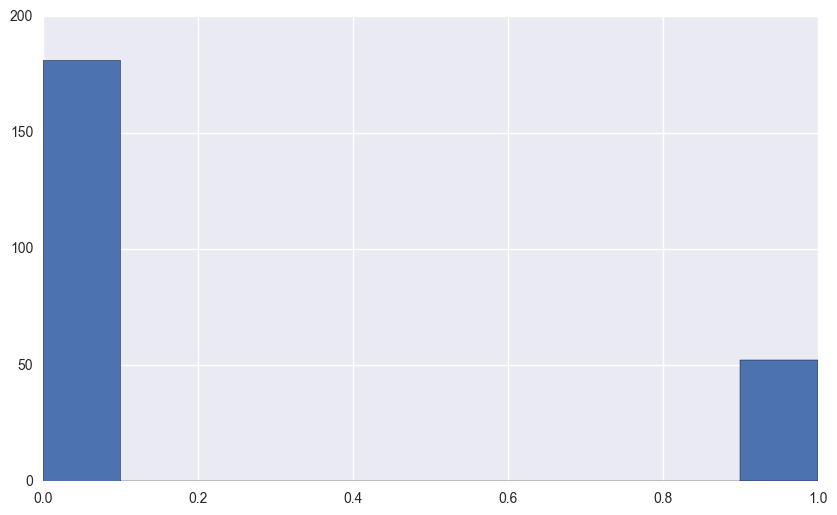

In [72]:
l = result_['label']
l.hist()

In [96]:
result_[['label', 'sp_dif']].head()

,label,sp_dif
0,1,48.0
2,0,1.0
3,1,351.0
4,1,32.0
5,0,19.0


In [32]:
result_['RBI_FEATURE_ID_y'] = result_['RBI_FEATURE_ID_y'].fillna(-1)
result_['RBI_FEATURE_ID_x'] = result_['RBI_FEATURE_ID_x'].fillna(-1)
result_.fillna(result_.mean())

,RBI_ID,RBI_ENTITY_ID,RBI_ENTITY_TYPE,RBI_ENTITY_NAME,RBI_RELEASE_ID,RBI_SPRINT_ID,RBI_TEAM_ID,RBI_OWNER,RBI_STORY_POINTS,RBI_STATUS,...,RBI_FEATURE_ID_x,DEFECTS_OPENED,RBI_FEATURE_ID_y,DEFECTS_CLOSED,RBI_FEATURE_ID_x,USERSTORIES_COUNT,RBI_FEATURE_ID_y,SUM(RBI_STORY_POINTS),sp_dif,label
0,5717,3974,REQ,Security- On Premise,1073.0,0.0,0.0,-1,12.0,New,...,3974.0,11.0,3974.0,31.0,3974.0,34.0,3974.0,60.0,48.0,1
2,8341,4822,REQ,Synchronizer - Filters,0.0,0.0,0.0,-1,9.0,New,...,-1.0,NaN,4822.0,12.0,4822.0,3.0,4822.0,10.0,1.0,0
3,8342,4823,REQ,Synchronizer - Link configuration,1104.0,0.0,0.0,-1,23.0,New,...,4823.0,1.0,4823.0,306.0,4823.0,228.0,4823.0,374.0,351.0,1
4,8343,4824,REQ,Synchronizer - Scheduled synchronization,1104.0,0.0,0.0,-1,4.0,New,...,4824.0,1.0,4824.0,2.0,4824.0,16.0,4824.0,36.0,32.0,1
5,8347,4828,REQ,Synchronizer - Mail notifications,1104.0,0.0,0.0,-1,5.0,New,...,4828.0,1.0,4828.0,30.0,4828.0,11.0,4828.0,24.0,19.0,0
6,8377,4848,REQ,Synchronizer - Integrity check,1104.0,0.0,0.0,-1,2.0,New,...,4848.0,1.0,4848.0,26.0,4848.0,21.0,4848.0,47.0,45.0,1
7,13500,7141,REQ,Synchronizer - Migration from old Synchronizer,1104.0,0.0,0.0,-1,3.0,New,...,-1.0,NaN,7141.0,33.0,7141.0,12.0,7141.0,35.0,32.0,1
8,16130,8777,REQ,UX Bucket for 2.1,1073.0,0.0,0.0,-1,30.0,New,...,-1.0,NaN,8777.0,6.0,8777.0,5.0,8777.0,7.0,-23.0,0
9,16339,8863,REQ,On Premise- supportability,1073.0,0.0,0.0,daniel.shmaya@hpe.com,34.0,New,...,-1.0,NaN,8863.0,5.0,8863.0,8.0,8863.0,39.0,5.0,0
10,16340,8864,REQ,On Premise- user management,1073.0,0.0,0.0,daniel.shmaya@hpe.com,28.0,New,...,8864.0,1.0,8864.0,16.0,8864.0,10.0,8864.0,48.0,20.0,0


In [33]:
result_.describe()

,RBI_ID,RBI_ENTITY_ID,RBI_RELEASE_ID,RBI_SPRINT_ID,RBI_TEAM_ID,RBI_STORY_POINTS,RBI_RANK,RBI_VER_STAMP,RBI_THEME_ID,RBI_PRODUCT_GROUP_ID,...,RBI_FEATURE_ID_x,DEFECTS_OPENED,RBI_FEATURE_ID_y,DEFECTS_CLOSED,RBI_FEATURE_ID_x,USERSTORIES_COUNT,RBI_FEATURE_ID_y,SUM(RBI_STORY_POINTS),sp_dif,label
count,233.000000,233.000000,233.000000,233.0,233.0,233.000000,2.330000e+02,233.000000,233.000000,233.000000,...,233.000000,64.000000,233.000000,138.000000,233.000000,227.000000,233.000000,233.000000,233.000000,233.000000
mean,20789.540773,11174.317597,869.866953,0.0,0.0,23.304721,9.206348e+06,22.278970,6630.373391,1000.364807,...,2916.725322,4.312500,6238.008584,25.811594,10895.008584,12.964758,11174.317597,40.562232,17.257511,0.223176
std,5753.700528,3038.943669,461.999146,0.0,0.0,33.644526,6.000496e+06,16.348424,3227.060427,1.221205,...,5095.195163,6.749192,5741.931192,44.433589,3497.994958,23.289228,3038.943669,73.258027,61.059628,0.417272
min,5717.000000,3974.000000,0.000000,0.0,0.0,0.000000,2.730000e+06,2.000000,0.000000,1000.000000,...,-1.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000,3974.000000,0.000000,-182.000000,0.000000
25%,16164.000000,8799.000000,1069.000000,0.0,0.0,6.000000,3.475000e+06,11.000000,6159.000000,1000.000000,...,-1.000000,NaN,-1.000000,NaN,8792.000000,NaN,8799.000000,8.000000,0.000000,0.000000
50%,19893.000000,10909.000000,1104.000000,0.0,0.0,15.000000,8.910000e+06,18.000000,6941.000000,1000.000000,...,-1.000000,NaN,7149.000000,NaN,10825.000000,NaN,10909.000000,21.000000,1.000000,0.000000
75%,25217.000000,13442.000000,1128.000000,0.0,0.0,28.000000,1.360700e+07,29.000000,7876.000000,1000.000000,...,6946.000000,NaN,10395.000000,NaN,13436.000000,NaN,13442.000000,42.000000,18.000000,0.000000
max,32838.000000,17771.000000,1187.000000,0.0,0.0,260.000000,2.399300e+07,110.000000,17725.000000,1013.000000,...,17289.000000,39.000000,17494.000000,306.000000,17771.000000,228.000000,17771.000000,626.000000,394.000000,1.000000


In [34]:
result_.fillna(result_.mean()['DEFECTS_OPENED'])

,RBI_ID,RBI_ENTITY_ID,RBI_ENTITY_TYPE,RBI_ENTITY_NAME,RBI_RELEASE_ID,RBI_SPRINT_ID,RBI_TEAM_ID,RBI_OWNER,RBI_STORY_POINTS,RBI_STATUS,...,RBI_FEATURE_ID_x,DEFECTS_OPENED,RBI_FEATURE_ID_y,DEFECTS_CLOSED,RBI_FEATURE_ID_x,USERSTORIES_COUNT,RBI_FEATURE_ID_y,SUM(RBI_STORY_POINTS),sp_dif,label
0,5717,3974,REQ,Security- On Premise,1073.0,0.0,0.0,-1,12.0,New,...,3974.0,11.0000,3974.0,31.0000,3974.0,34.0000,3974.0,60.0,48.0,1
2,8341,4822,REQ,Synchronizer - Filters,0.0,0.0,0.0,-1,9.0,New,...,-1.0,4.3125,4822.0,12.0000,4822.0,3.0000,4822.0,10.0,1.0,0
3,8342,4823,REQ,Synchronizer - Link configuration,1104.0,0.0,0.0,-1,23.0,New,...,4823.0,1.0000,4823.0,306.0000,4823.0,228.0000,4823.0,374.0,351.0,1
4,8343,4824,REQ,Synchronizer - Scheduled synchronization,1104.0,0.0,0.0,-1,4.0,New,...,4824.0,1.0000,4824.0,2.0000,4824.0,16.0000,4824.0,36.0,32.0,1
5,8347,4828,REQ,Synchronizer - Mail notifications,1104.0,0.0,0.0,-1,5.0,New,...,4828.0,1.0000,4828.0,30.0000,4828.0,11.0000,4828.0,24.0,19.0,0
6,8377,4848,REQ,Synchronizer - Integrity check,1104.0,0.0,0.0,-1,2.0,New,...,4848.0,1.0000,4848.0,26.0000,4848.0,21.0000,4848.0,47.0,45.0,1
7,13500,7141,REQ,Synchronizer - Migration from old Synchronizer,1104.0,0.0,0.0,-1,3.0,New,...,-1.0,4.3125,7141.0,33.0000,7141.0,12.0000,7141.0,35.0,32.0,1
8,16130,8777,REQ,UX Bucket for 2.1,1073.0,0.0,0.0,-1,30.0,New,...,-1.0,4.3125,8777.0,6.0000,8777.0,5.0000,8777.0,7.0,-23.0,0
9,16339,8863,REQ,On Premise- supportability,1073.0,0.0,0.0,daniel.shmaya@hpe.com,34.0,New,...,-1.0,4.3125,8863.0,5.0000,8863.0,8.0000,8863.0,39.0,5.0,0
10,16340,8864,REQ,On Premise- user management,1073.0,0.0,0.0,daniel.shmaya@hpe.com,28.0,New,...,8864.0,1.0000,8864.0,16.0000,8864.0,10.0000,8864.0,48.0,20.0,0


In [35]:
# pd.merge(df, result, on='RBI_FEATURE_ID')

In [36]:
# df4 = df4.dropna()
# df1 = df1.dropna()

In [37]:
# list(set(df1.RBI_FEATURE_ID.tolist()).intersection(df4.RBI_FEATURE_ID.tolist()))

In [38]:
from collections import Counter
x = df1.RBI_FEATURE_ID.tolist().extend(df4.RBI_FEATURE_ID.tolist())

In [39]:
# df1.RBI_FEATURE_ID.tolist()

In [40]:
df = df[[u'RBI_ID', u'RBI_ENTITY_ID', u'RBI_ENTITY_TYPE', u'RBI_ENTITY_NAME',
       u'RBI_RELEASE_ID', u'RBI_SPRINT_ID', u'RBI_TEAM_ID', u'RBI_OWNER',
       u'RBI_STORY_POINTS', u'RBI_STATUS', u'RBI_BLOCKED', u'RBI_RANK', u'RBI_VER_STAMP', u'RBI_VTS',
       u'RBI_THEME_ID', u'RBI_FEATURE_ID', u'RBI_PRODUCT_ID',
       u'RBI_KANBAN_STATUS_ID', u'RBI_KANBAN_PARENT_STATUS_ID',
       u'RBI_ARCHIVE_STATUS', u'RBI_PRODUCT_GROUP_ID', u'RBI_ENTITY_SUB_TYPE',
       u'RBI_CREATION_DATE', u'RBI_LINKED_ENTITIES_INFO']]
df.describe()
# df.head()

NameError: name 'df' is not defined

In [41]:
len(df[df.RBI_STORY_POINTS.notnull()==True])
len(result[result.RBI_STORY_POINTS.notnull()==True])

NameError: name 'df' is not defined

In [42]:
DF_bug = df.loc[df['RBI_ENTITY_TYPE']=='BUG']
DF_REQ = df.loc[df['RBI_ENTITY_TYPE']=='REQ']

NameError: name 'df' is not defined

In [43]:
np.mean(DF_REQ['RBI_STORY_POINTS'])


NameError: name 'DF_REQ' is not defined

In [297]:
features = DF_REQ[DF_REQ['RBI_ENTITY_SUB_TYPE']==71]
stories = DF_REQ[DF_REQ['RBI_ENTITY_SUB_TYPE']==70 ]
themes = DF_REQ[DF_REQ['RBI_ENTITY_SUB_TYPE']==72]

In [306]:
features = df[df['RBI_ENTITY_SUB_TYPE']==71  ]
features = features[features.RBI_STORY_POINTS.notnull()==True]

In [307]:
features.describe()

,RBI_ID,RBI_ENTITY_ID,RBI_RELEASE_ID,RBI_SPRINT_ID,RBI_TEAM_ID,RBI_STORY_POINTS,RBI_RANK,RBI_VER_STAMP,RBI_THEME_ID,RBI_FEATURE_ID,RBI_PRODUCT_ID,RBI_KANBAN_STATUS_ID,RBI_KANBAN_PARENT_STATUS_ID,RBI_ARCHIVE_STATUS,RBI_PRODUCT_GROUP_ID,RBI_ENTITY_SUB_TYPE,RBI_LINKED_ENTITIES_INFO
count,269.000000,269.000000,211.000000,0.0,0.0,269.000000,2.690000e+02,269.000000,244.000000,0.0,0.0,0.0,0.0,269.000000,269.000000,269.0,269.00000
mean,21624.070632,11628.486989,1117.658768,NaN,NaN,25.706320,1.044671e+07,20.717472,7936.274590,NaN,NaN,NaN,NaN,0.007435,1001.000000,71.0,0.05948
std,6084.073525,3230.925053,29.440289,NaN,NaN,49.242387,6.692208e+06,16.014747,3581.677393,NaN,NaN,NaN,NaN,0.086065,2.598794,0.0,0.38171
min,5717.000000,3974.000000,1052.000000,NaN,NaN,0.000000,2.730000e+06,2.000000,1075.000000,NaN,NaN,NaN,NaN,0.000000,1000.000000,71.0,0.00000
25%,16357.000000,8878.000000,NaN,NaN,NaN,5.000000,3.546000e+06,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1000.000000,71.0,0.00000
50%,20705.000000,11522.000000,NaN,NaN,NaN,15.000000,1.076300e+07,16.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1000.000000,71.0,0.00000
75%,26274.000000,14008.000000,NaN,NaN,NaN,28.000000,1.431200e+07,27.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1000.000000,71.0,0.00000
max,32895.000000,17817.000000,1191.000000,NaN,NaN,600.000000,2.403700e+07,110.000000,17808.000000,NaN,NaN,NaN,NaN,1.000000,1013.000000,71.0,5.00000


In [182]:
# features.RBI_STORY_POINTS[features.RBI_STORY_POINTS.isnull() = 'False']
# len(stories)

from collections import Counter
Counter(features.RBI_STORY_POINTS.isnull())

Counter({False: 269, True: 985})

In [189]:
len(features)

1254

In [188]:
len(features.RBI_STORY_POINTS.dropna())

269

In [115]:
# features.RBI_STORY_POINTS[features.RBI_STORY_POINTS!= features.RBI_STORY_POINTS.tolist()[0]]

In [116]:
# DF_REQ.groupby(['RBI_ENTITY_SUB_TYPE', 'RBI_TEAM_ID'])['RBI_STORY_POINTS'].agg({'sum' : np.sum, 'mean' : np.mean, 'std': np.std})

In [133]:
DF_REQ.groupby(['RBI_SPRINT_ID'])['RBI_STORY_POINTS'].agg({'sum' : np.sum, 'mean' : np.mean, 'std': np.std})

,std,sum,mean
RBI_SPRINT_ID,,,
1001.0,0.0,6.0,3.0
1003.0,NaN,3.0,3.0
1006.0,0.0,4.0,2.0
1008.0,NaN,1.0,1.0
1011.0,NaN,1.0,1.0
1013.0,NaN,NaN,NaN


In [112]:
grouped = df.groupby(['RBI_ENTITY_ID', 'RBI_RELEASE_ID', 'RBI_TEAM_ID'])['RBI_STORY_POINTS']
grouped = REQ.groupby(['RBI_ENTITY_SUB_TYPE'])['RBI_STORY_POINTS']

In [ ]:
Features = groupby(df).filter(lambda x: x.sum() > 2)

In [113]:
for name, group in grouped:
    print(name)

    print(group.values[0])

0.0
3.0
1.0
nan
70.0
1.0


In [43]:
group.values[0]

3.0

In [222]:
# limit_rows   = 7000000
# df           = pd.read_csv("../kaggle/data/train_ver2.csv",dtype={"sexo":str,
#                                                     "ind_nuevo":str,
#                                                     "ult_fec_cli_1t":str,
#                                                     "indext":str}, nrows=limit_rows)
unique_ids   = pd.Series(df.RBI_FEATURE_ID.unique())
limit_people = 1e3
unique_id    = unique_ids.sample()
df           = df[df.RBI_FEATURE_ID.isin(unique_id)]


In [272]:
# DF_REQ['RBI_TEAM_ID']
DF_REQ = DF_REQ[DF_REQ.RBI_STORY_POINTS.notnull()==True]
DF_REQ.describe()

,RBI_ID,RBI_ENTITY_ID,RBI_RELEASE_ID,RBI_SPRINT_ID,RBI_TEAM_ID,RBI_STORY_POINTS,RBI_RANK,RBI_VER_STAMP,RBI_THEME_ID,RBI_FEATURE_ID,RBI_PRODUCT_ID,RBI_KANBAN_STATUS_ID,RBI_KANBAN_PARENT_STATUS_ID,RBI_ARCHIVE_STATUS,RBI_PRODUCT_GROUP_ID,RBI_ENTITY_SUB_TYPE,RBI_LINKED_ENTITIES_INFO
count,8099.000000,8099.000000,7096.000000,5995.000000,6161.000000,8099.000000,8.099000e+03,7663.000000,7777.000000,8099.000000,5499.000000,6567.000000,5636.000000,8099.000000,8099.000000,8099.000000,8099.000000
mean,18834.167058,10242.623410,1078.467165,1680.936280,339.924363,3.857884,1.152550e+07,22.863500,7257.990999,8781.961847,5.014548,833.115121,936.182221,0.181133,1000.338560,66.905791,0.325719
std,8513.206026,4394.553921,44.583846,390.840206,109.539421,6.910012,7.186041e+06,12.833142,3434.795023,4113.198881,7.175892,455.018320,337.329825,0.385153,0.803462,14.389096,1.375021
min,1354.000000,626.000000,1001.000000,1001.000000,101.000000,0.000000,6.000000e+03,3.000000,612.000000,0.000000,1.000000,4.000000,56.000000,0.000000,1000.000000,0.000000,0.000000
25%,12767.500000,6750.500000,NaN,NaN,NaN,1.000000,5.078500e+06,NaN,NaN,5372.000000,NaN,NaN,NaN,0.000000,1000.000000,70.000000,0.000000
50%,19197.000000,10394.000000,NaN,NaN,NaN,2.000000,1.125800e+07,NaN,NaN,8705.000000,NaN,NaN,NaN,0.000000,1000.000000,70.000000,0.000000
75%,26213.000000,13972.500000,NaN,NaN,NaN,4.000000,1.791950e+07,NaN,NaN,12701.000000,NaN,NaN,NaN,0.000000,1000.000000,70.000000,0.000000
max,32968.000000,17867.000000,1187.000000,2495.000000,508.000000,100.000000,2.410500e+07,109.000000,17725.000000,17771.000000,57.000000,1626.000000,1619.000000,1.000000,1013.000000,70.000000,58.000000


In [223]:
pd.merge(df_new, df_n, on='subject_id')

,RBI_ID,RBI_ENTITY_ID,RBI_ENTITY_TYPE,RBI_ENTITY_NAME,RBI_RELEASE_ID,RBI_SPRINT_ID,RBI_TEAM_ID,RBI_OWNER,RBI_STORY_POINTS,RBI_STATUS,...,RBI_THEME_ID,RBI_FEATURE_ID,RBI_PRODUCT_ID,RBI_KANBAN_STATUS_ID,RBI_KANBAN_PARENT_STATUS_ID,RBI_ARCHIVE_STATUS,RBI_PRODUCT_GROUP_ID,RBI_ENTITY_SUB_TYPE,RBI_CREATION_DATE,RBI_LINKED_ENTITIES_INFO
14336,19454,10572,REQ,"Handle Views (merge, convert to calculated field)",1091.0,1707.0,391.0,roni@hpe.com,10.0,Done,...,7876.0,10571,1.0,1022.0,1023.0,0,1000,70.0,27-���� -2014,1
14337,19456,10574,REQ,Improve generated SQLs,NaN,NaN,NaN,hofit.elimeleh@hpe.com,10.0,New,...,7876.0,10571,1.0,NaN,NaN,0,1000,70.0,27-���� -2014,0
14809,19455,10573,REQ,Execute view queries on demand,1091.0,1705.0,391.0,roni@hpe.com,10.0,Done,...,7876.0,10571,1.0,1022.0,1023.0,0,1000,70.0,27-���� -2014,1


In [74]:
result_["VTSdate"] = pd.to_datetime(result_["RBI_VTS"],format="%Y-%m-%d")
# df["fecha_alta"] = pd.to_datetime(df["fecha_alta"],format="%Y-%m-%d")
result_["VTSdate"].unique()[0]

numpy.datetime64('2014-09-30T10:03:23.000000000')

In [104]:
result_.RBI_STATUS.describe()

count     233
unique      1
top       New
freq      233
Name: RBI_STATUS, dtype: object

In [130]:
result_ = result_.drop(result_["RBI_CREATION_DATE"], axis = 1)

In [77]:
result_["month"] = pd.DatetimeIndex(result_["VTSdate"]).month
# result_["RBI_ENTITY_SUB_TYPE"]   = pd.to_numeric(df["RBI_ENTITY_SUB_TYPE"], errors="coerce")

In [79]:
result_.isnull().any()

RBI_ID                      False
RBI_ENTITY_ID               False
RBI_ENTITY_TYPE             False
RBI_ENTITY_NAME             False
RBI_RELEASE_ID              False
RBI_SPRINT_ID               False
RBI_TEAM_ID                 False
RBI_OWNER                   False
RBI_STORY_POINTS            False
RBI_STATUS                  False
RBI_RANK                    False
RBI_VER_STAMP               False
RBI_VTS                     False
RBI_THEME_ID                False
RBI_PRODUCT_GROUP_ID        False
RBI_CREATION_DATE           False
RBI_LINKED_ENTITIES_INFO    False
RBI_FEATURE_ID_x            False
DEFECTS_OPENED               True
RBI_FEATURE_ID_y            False
DEFECTS_CLOSED               True
RBI_FEATURE_ID_x            False
USERSTORIES_COUNT            True
RBI_FEATURE_ID_y            False
SUM(RBI_STORY_POINTS)       False
sp_dif                      False
label                       False
VTSdate                     False
month                       False
dtype: bool

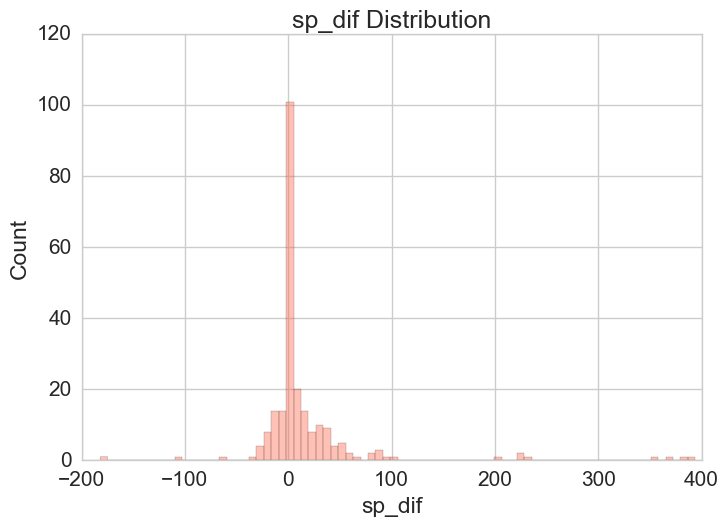

In [47]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(result_["sp_dif"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    sns.plt.title("sp_dif Distribution")
    plt.ylabel("Count")

In [105]:
# df.loc[df['RBI_ENTITY_TYPE'] =="REQ","RBI_STORY_POINTS"] 

In [75]:
df.loc[df['RBI_ENTITY_TYPE'] =="BUG","RBI_STORY_POINTS"] 

Series([], Name: RBI_STORY_POINTS, dtype: float64)

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

In [ ]:
result_

In [78]:
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

In [80]:
x = result_.drop(['label'], axis=1)

In [118]:
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn

columns = ['RBI_STORY_POINTS', 'USERSTORIES_COUNT', 'RBI_TEAM_ID', 'RBI_THEME_ID','DEFECTS_CLOSED', 'DEFECTS_OPENED', 'RBI_RANK']

def create_sklearn_compatible_x_y(df):
    X = df[columns]
    y = df.label.values
    return X, y

X, y = create_sklearn_compatible_x_y(result_)
X= X.fillna(-1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)




In [48]:
# X = result_.drop(['label', 'RBI_CREATION_DATE'], axis=1) 
# y = result_[['label']]
# t = round(0.8*len(X))
# X_train, y_train = X.ix[:t], y.ix[:t]
# X_test, y_test = X.ix[t+1:], y.ix[:t]

In [ ]:
features = DF_REQ[DF_REQ['RBI_ENTITY_SUB_TYPE']==71]

In [109]:
cols_to_retain = [ 'RBI_TEAM_ID' ]
cat_dict = result_[ cols_to_retain ].to_dict( orient = 'records' )
cat_dict[0]

{'RBI_TEAM_ID': 0.0}

In [106]:
len(X_train)
X_train.columns

Index([u'RBI_STORY_POINTS', u'USERSTORIES_COUNT', u'RBI_TEAM_ID',
       u'RBI_THEME_ID', u'DEFECTS_CLOSED', u'DEFECTS_OPENED', u'RBI_RANK'],
      dtype='object')

In [ ]:
features = DF_REQ[DF_REQ['RBI_ENTITY_SUB_TYPE']==71]

In [114]:
X_train = X_train.fillna(-1)

In [119]:
# fit a logistic regression model to the data
# scaler = preprocessing.StandardScaler().fit(X_train)


model = LogisticRegression()
model.fit(X_train, y_train)

print(model)
#make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

          0       0.82      1.00      0.90        63
          1       0.00      0.00      0.00        14

avg / total       0.67      0.82      0.74        77

[[63  0]
 [14  0]]


/Users/talb/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [107]:
X_train.ix[0]

RBI_STORY_POINTS          12.0
USERSTORIES_COUNT         34.0
RBI_TEAM_ID                0.0
RBI_THEME_ID            8853.0
DEFECTS_CLOSED            31.0
DEFECTS_OPENED            11.0
RBI_RANK             3467000.0
Name: 0, dtype: float64

In [121]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(result_.RBI_THEME_ID)

/Users/talb/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


OneHotEncoder(categorical_features='all', dtype=<type 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [67]:
X, y = create_sklearn_compatible_x_y(result_)

In [68]:
X_train = result_.ix[:t]
X_test = result_.ix[t+1:]


X_train, y_train = create_sklearn_compatible_x_y(X_train)
X_valid, y_valid = create_sklearn_compatible_x_y(X_test)

In [69]:
X_train = X_train.drop(['RBI_CREATION_DATE'], axis=1) 
X_train.iloc[0]

ValueError: labels ['RBI_CREATION_DATE'] not contained in axis

In [70]:
X_train.drop(['RBI_CREATION_DATE'], axis=1) 

ValueError: labels ['RBI_CREATION_DATE'] not contained in axis

In [58]:
import sklearn.ensemble
max_estimators = 100
tree_num = np.linspace(max_estimators/10, max_estimators, max_estimators/10)

model = sklearn.ensemble.GradientBoostingRegressor(n_estimators=max_estimators,
                                                   subsample=.5,
                                                   max_depth=2)
model.fit(X_train.to_a, y_train)

In [26]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

/Users/talb/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [62]:
y, X = dmatrices('label ~ .',
                  result_, return_type="dataframe")
print X.columns

SyntaxError: invalid syntax (<unknown>, line 1)

In [88]:
result_.to_csv('../../dev/risk_data.csv')

In [64]:
array(result_)

array([[5717, 3974, 'REQ', ..., 48.0, 1, Timestamp('2014-09-30 10:03:23')],
       [8341, 4822, 'REQ', ..., 1.0, 0, Timestamp('2014-09-30 10:05:08')],
       [8342, 4823, 'REQ', ..., 351.0, 1, Timestamp('2015-03-10 13:33:13')],
       ..., 
       [28739, 15350, 'REQ', ..., 26.0, 1, Timestamp('2015-12-01 03:57:07')],
       [32437, 17494, 'REQ', ..., -10.0, 0,
        Timestamp('2016-07-04 07:16:48')],
       [28947, 15480, 'REQ', ..., -63.0, 0,
        Timestamp('2015-07-12 03:36:40')]], dtype=object)

In [89]:
from sklearn_pandas import DataFrameMapper, cross_val_score

/Users/talb/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [91]:
import sklearn.preprocessing, sklearn.decomposition,sklearn.linear_model, sklearn.pipeline, sklearn.metrics
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cols_to_retain = [ 'a', 'list', 'of', 'categorical', 'column', 'names' ]
cat_dict = df[ cols_to_retain ].to_dict( orient = 'records' )

In [3]:
result_.to_csv('../../dev/risk_data.csv')

NameError: name 'result_' is not defined

NameError: name 'df' is not defined

In [49]:
df = pd.read_csv("../../../../OneDrive - Hewlett Packard Enterprise/featuresRiskEvaluator/EVENTS.csv", infer_datetime_format=True)#, dtype={"RBI_FEATURE_ID":int, "RBI_ENTITY_ID":int})

In [50]:
df.head()

,RBI_ENTITY_ID,RBI_ENTITY_NAME,AP_PROPERTY_NAME,AU_ACTION,AU_USER,AU_TIME,AP_OLD_VALUE,AP_NEW_VALUE
0,2945,New Product Backlog (theme and feature),Task Status,UPDATE,tomer.avni@hp.com,30-AUG-2012,New,Completed
1,4897,P0 - Sprint Closure,Priority,UPDATE,miroslav.novak@hpe.com,21-FEB-2014,NaN,1-High
2,13836,Selenuim,Task Status,UPDATE,elad.menashe@hpe.com,29-APR-2015,New,In Progress
3,3965,Task Board - old,Severity,UPDATE,ran.mizrahi@hpe.com,10-FEB-2014,NaN,2-High
4,6989,AGM mobile application,Detected in Release,UPDATE,_synchronizer_system_user_,16-AUG-2016,NaN,AGM 2.5X (for Kim)


In [32]:

groups = df.groupby(["RBI_ENTITY_ID"])['AP_PROPERTY_NAME', 'AP_NEW_VALUE']

In [34]:
df["AU_TIME"].dtype

dtype('O')

In [43]:
df["date"] = pd.to_datetime(df["AU_TIME"],format="%d-%b-%Y")#, errors='ignore')
# df["fecha_alta"] = pd.to_datetime(df["fecha_alta"],format="%Y-%m-%d")
df["date"].unique()[:5]

array(['2012-08-30T00:00:00.000000000', '2014-02-21T00:00:00.000000000',
       '2015-04-29T00:00:00.000000000', '2014-02-10T00:00:00.000000000',
       '2016-08-16T00:00:00.000000000'], dtype='datetime64[ns]')

In [52]:
for k, gp in groups:
    print 'key=' + str(k)
    gp.AP_PROPERTY_NAME
    print len(gp)

key=619
20
key=1078
22
key=1079
17
key=1080
26
key=1082
23
key=1085
27
key=1202
10
key=1246
16
key=1311
27
key=1312
28
key=1313
16
key=1314
25
key=1316
12
key=1317
17
key=1318
24
key=1333
24
key=1346
26
key=1347
20
key=1428
20
key=1430
20
key=1639
16
key=1643
28
key=1740
22
key=1744
16
key=1757
21
key=1778
12
key=1790
24
key=1792
23
key=1793
22
key=1795
24
key=1815
17
key=1816
17
key=1838
27
key=1846
11
key=1847
21
key=1863
25
key=2088
23
key=2091
21
key=2092
18
key=2093
22
key=2094
8
key=2095
11
key=2108
14
key=2146
17
key=2187
19
key=2188
23
key=2189
20
key=2190
13
key=2191
18
key=2194
22
key=2202
16
key=2232
21
key=2236
20
key=2256
15
key=2359
21
key=2526
17
key=2540
13
key=2541
15
key=2545
10
key=2557
15
key=2623
11
key=2629
4
key=2637
17
key=2686
13
key=2881
21
key=2945
14
key=2964
23
key=3052
19
key=3053
10
key=3054
14
key=3055
10
key=3169
12
key=3303
9
key=3345
14
key=3477
11
key=3486
9
key=3529
12
key=3574
18
key=3590
11
key=3653
21
key=3677
16
key=3682
22
key=3694
20
key=3697


In [21]:
len(df.AP_PROPERTY_NAME.unique())
df.AP_PROPERTY_NAME.unique()

array(['Task Status', 'Theme', 'Entity name', 'QC Defect ID', 'Regression',
       'Severity', 'Application', 'Fixed In Branch', 'Tag', 'Description',
       'Detected in Release', 'Archive Status', 'QA Owner', 'Release',
       'Defect Status', 'Closed on Date', 'Requirement Type', 'Doc Status',
       'Priority', 'L10N Impact', 'Direct Cover Status', 'Story Points',
       'Security Impact', 'Target Cycle', 'Target Release',
       'Customer Encountered', 'Target Push', 'Assigned To',
       'Task Assignee', 'Requested by Customer', 'Ready for Development',
       'FA/Development Status', 'Branch to Test', 'Language', 'G11N Types',
       'AGM GUID (User Story)', 'Feature Status', 'Status', 'QC GUID',
       'Feature Parent ID', 'AGM GUID (Feature)', 'Feature QA Owner',
       'AGM GUID (Theme)', 'Feature', 'Applications', 'QA Coverage',
       'AGM GUID (Defect)', 'Module', 'QC GUID (User Story)', 'QCGUID',
       'Fix Reqs Docs', 'Defects Reduction', 'WSJF RR | OE',
       'WSJF Bu

In [22]:
len(df.RBI_ENTITY_ID.

1246

In [2]:
list(df.groupby(df.dtypes, axis=1))

NameError: name 'df' is not defined

In [82]:
gp.AU_TIME.sort

<bound method Series.sort of 11609    26-OCT-2016
11610    26-OCT-2016
11611    26-OCT-2016
11616    26-OCT-2016
Name: AU_TIME, dtype: object>

In [77]:
result_[result_.RBI_ENTITY_ID==4897]

,RBI_ID,RBI_ENTITY_ID,RBI_ENTITY_TYPE,RBI_ENTITY_NAME,RBI_RELEASE_ID,RBI_SPRINT_ID,RBI_TEAM_ID,RBI_OWNER,RBI_STORY_POINTS,RBI_STATUS,...,RBI_FEATURE_ID_y,DEFECTS_OPENED,RBI_FEATURE_ID_x,DEFECTS_CLOSED,RBI_FEATURE_ID_y,USERSTORIES_COUNT,RBI_FEATURE_ID,SUM(RBI_STORY_POINTS),sp_dif,label


In [81]:
set(df.RBI_ENTITY_ID).intersection(result_.RBI_ENTITY_ID)

{3974,
 4822,
 4823,
 4824,
 4828,
 4848,
 6397,
 6411,
 6924,
 6946,
 6951,
 6957,
 6963,
 6983,
 6987,
 6997,
 7082,
 7136,
 7138,
 7141,
 7144,
 7145,
 7146,
 7149,
 7150,
 7151,
 7152,
 7176,
 7202,
 7215,
 7223,
 7225,
 7293,
 7300,
 7319,
 7329,
 7339,
 7347,
 7348,
 7534,
 7585,
 7616,
 7868,
 7882,
 7883,
 8063,
 8457,
 8705,
 8775,
 8777,
 8782,
 8790,
 8791,
 8792,
 8793,
 8794,
 8795,
 8796,
 8799,
 8801,
 8812,
 8855,
 8862,
 8863,
 8864,
 8877,
 8878,
 8879,
 8888,
 9074,
 9433,
 9434,
 9435,
 9482,
 9532,
 9533,
 9612,
 9642,
 9762,
 9790,
 9820,
 9841,
 9843,
 10017,
 10018,
 10019,
 10020,
 10021,
 10022,
 10024,
 10082,
 10107,
 10278,
 10279,
 10333,
 10395,
 10520,
 10521,
 10522,
 10531,
 10533,
 10534,
 10535,
 10536,
 10537,
 10538,
 10565,
 10571,
 10805,
 10818,
 10820,
 10823,
 10824,
 10825,
 10826,
 10907,
 10909,
 10911,
 10912,
 10918,
 10977,
 10994,
 11014,
 11028,
 11055,
 11076,
 11081,
 11500,
 11522,
 11621,
 11659,
 11724,
 11834,
 12172,
 12246,
 12